<a href="https://colab.research.google.com/github/gyeowool/ai/blob/main/Student_%EC%A0%84%EC%B2%98%EB%A6%AC%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (옵션) Colab에서 한글 폰트가 깨질 경우에만 실행하세요.
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib
# !pip install gdown # gdown 대신 다른 방식으로 데이터 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

print("✅ 라이브러리 불러오기 완료!")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
import re

# Google Sheet URL
sheet_url = 'https://docs.google.com/spreadsheets/d/10Emad_nDWzAerWMMyTbC9pSHZxxZVaFpBjLxO3wxqIo/edit?usp=sharing'

# 스프레드시트 ID 추출
match = re.search(r'/d/([a-zA-Z0-9_-]+)', sheet_url)
if match:
    spreadsheet_id = match.group(1)
else:
    print("스프레드시트 ID를 찾을 수 없습니다.")
    exit()

# 첫 번째 시트의 GID는 일반적으로 0입니다. 여러 시트가 있는 경우 변경해야 할 수 있습니다.
gid = '0'

# 데이터를 CSV로 내보내기 위한 URL을 직접 구성합니다.
csv_export_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/gviz/tq?tqx=out:csv&gid={gid}'

# 데이터를 pandas DataFrame으로 읽어옵니다.
try:
    df = pd.read_csv(csv_export_url)
    print("데이터를 성공적으로 불러왔습니다!")
    display(df.head())
except Exception as e:
    print(f"데이터 로드 중 오류 발생: {e}")
    print("Google Sheet의 공유 설정이 '링크가 있는 모든 사용자가 볼 수 있음'으로 되어 있는지 확인해주세요.")
    print("그리고 시트 URL이 올바른지, 특히 GID(시트 ID)가 정확한지 확인해주세요.")

데이터를 성공적으로 불러왔습니다!


,개인정보,성별,나이,키,출생 연도,출생 월,평균 수면 시간,아침식사,주 평균 운동 빈도,하루 평균 인터넷 사용 시간,...,주로 사용하는 손,등교 방법,"평균 등교 시간 (분 단위, 집 문에서 교실 문까지)",활동 성향,선호하는 공부 장소,6월 국어 모의고사 등급,6월 수학 모의고사 등급,6월 영어 모의고사 등급,6월 탐구 모의고사 평균 등급,내신 평균 등급
0,동의함,남,18.0,174.0,2008,3월,6.0,안 먹는다.,5,3.5,...,오른손,자전거,10,저녁형 인간,사설 독서실 (관리형/자율형),3.0,1.0,1.0,4.0,3.0
1,동의함,남,18.0,183.0,2008,2월,6.0,가끔 먹는다.,4,5.5,...,오른손,도보,10,아침형 인간,사설 독서실 (관리형/자율형),2.0,4.0,2.0,1.0,3.0
2,동의함,남,18.0,180.0,2008,8월,6.0,항상 먹는다.,7,3.5,...,왼손,대중교통,20,저녁형 인간,사설 독서실 (관리형/자율형),1.0,1.0,1.0,1.0,3.0
3,동의함,남,18.0,172.0,2008,10월,7.0,항상 먹는다.,2,0.5,...,오른손,대중교통,30,아침형 인간,학교 야자실,3.0,5.0,5.0,4.5,4.5
4,동의함,남,18.0,180.0,2008,1월,6.0,가끔 먹는다.,2,1.5,...,오른손,도보,10,저녁형 인간,집 - 개인 방,1.0,1.0,1.0,1.0,1.0


/tmp/ipython-input-2597669028.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MBTI', y='내신 평균 등급', data=avg_grade_by_mbti, palette='viridis')


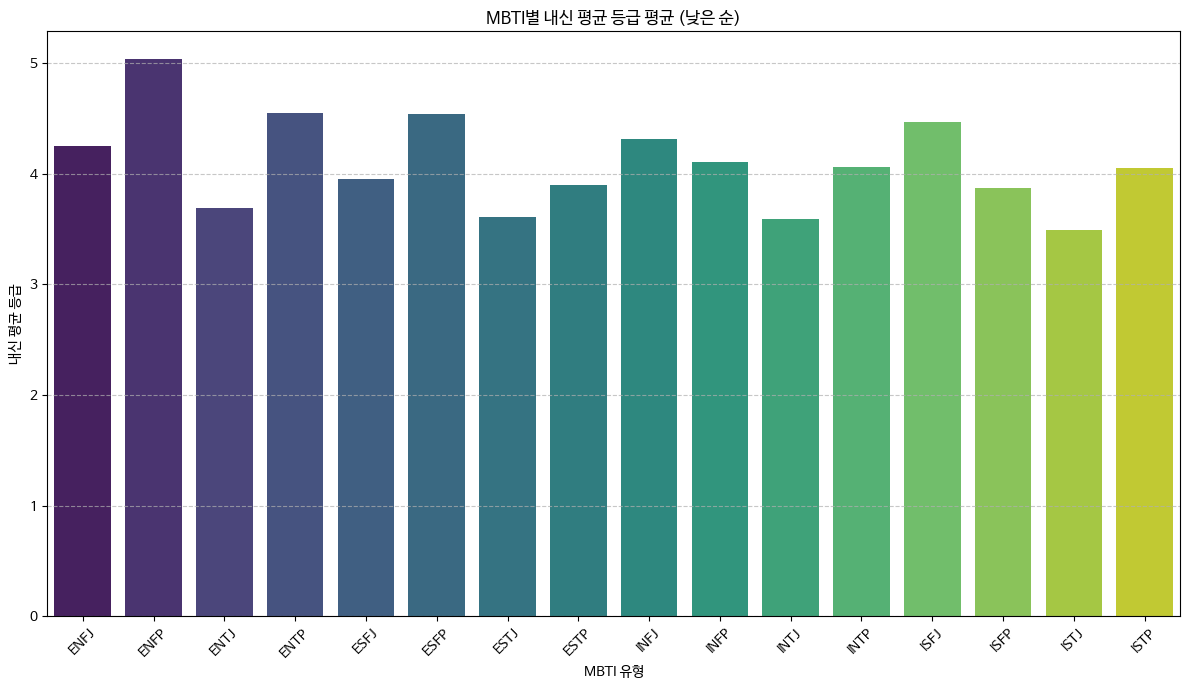

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# MBTI별 내신 평균 등급 평균 (이미 낮은 순으로 정렬되어 있습니다)
# avg_grade_by_mbti 변수는 이전 셀에서 계산되었으므로, 해당 변수를 사용합니다.

plt.figure(figsize=(12, 7))
sns.barplot(x='MBTI', y='내신 평균 등급', data=avg_grade_by_mbti, palette='viridis')
plt.title('MBTI별 내신 평균 등급 평균 (낮은 순)')
plt.xlabel('MBTI 유형')
plt.ylabel('내신 평균 등급')
plt.xticks(rotation=45) # MBTI 유형 이름이 겹치지 않도록 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # 레이아웃 자동 조정
plt.show()

In [ ]:
import pandas as pd

# 'MBTI'와 '내신 평균 등급' 컬럼에 결측값이 있을 수 있으므로 제거합니다.
# 또한, 데이터 타입이 올바른지 확인하고 필요한 경우 변환합니다.
# '내신 평균 등급'은 숫자로 가정합니다.

df_mbti_grade = df[['MBTI', '내신 평균 등급']].dropna()

# MBTI별 내신 평균 등급의 평균을 계산합니다.
avg_grade_by_mbti = df_mbti_grade.groupby('MBTI')['내신 평균 등급'].mean().reset_index()

# 결과를 출력합니다.
print("MBTI별 내신 평균 등급 평균:")
display(avg_grade_by_mbti.sort_values(by='내신 평균 등급', ascending=True))

MBTI별 내신 평균 등급 평균:


,MBTI,내신 평균 등급
14,ISTJ,3.493902
10,INTJ,3.592105
6,ESTJ,3.608333
2,ENTJ,3.687500
13,ISFP,3.872340
7,ESTP,3.894444
4,ESFJ,3.952381
15,ISTP,4.052632
11,INTP,4.060440
9,INFP,4.103125


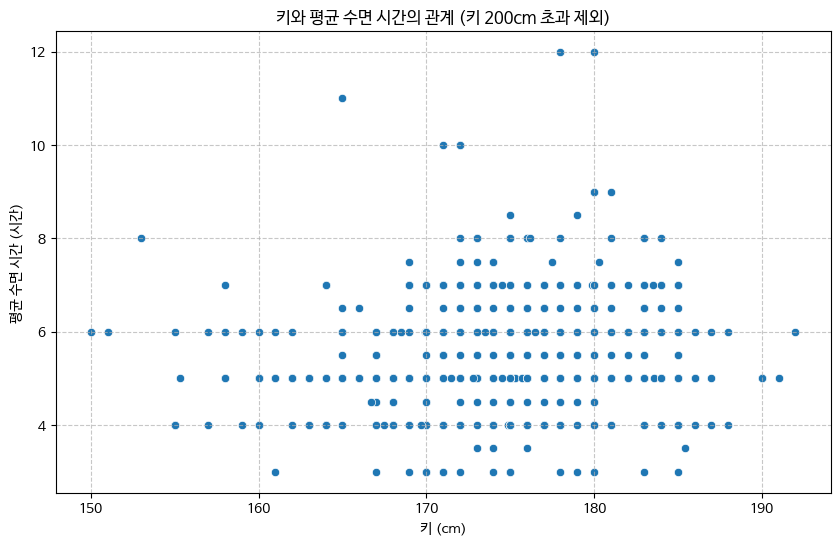

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# '키'와 '평균 수면 시간' 컬럼이 숫자인지 확인하고, 필요하다면 변환합니다.
# 또한, 결측값이 있다면 시각화에 영향을 미치지 않도록 처리합니다.
# 여기서는 간단하게 결측값을 제거하고 시각화를 진행합니다.
# 실제 데이터 분석 시에는 결측값 처리 전략(예: 평균으로 대체)을 고려해야 합니다.

df_cleaned = df[['키', '평균 수면 시간']].dropna()

# 키가 200을 초과하는 친구들을 제외합니다.
df_filtered = df_cleaned[df_cleaned['키'] <= 200]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='키', y='평균 수면 시간', data=df_filtered)
plt.title('키와 평균 수면 시간의 관계 (키 200cm 초과 제외)')
plt.xlabel('키 (cm)')
plt.ylabel('평균 수면 시간 (시간)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()